Grip open
Grip close
Grip open
Grip close
Grip open
Moving to: (10, 7, 0)
Moving second join to: (10, 7, 0)
('A2 arccos value', 0.36347248576850094)
('A3 numerator, denominator', -14.159806442801909, 148.32565483254197)
('projections', 10.0, 7.0, 0)
('angles', 0.0, 1.1988037080609266, -0.09517588391838853)
('Final position', [9.72753766790992, 8.76824211247175])


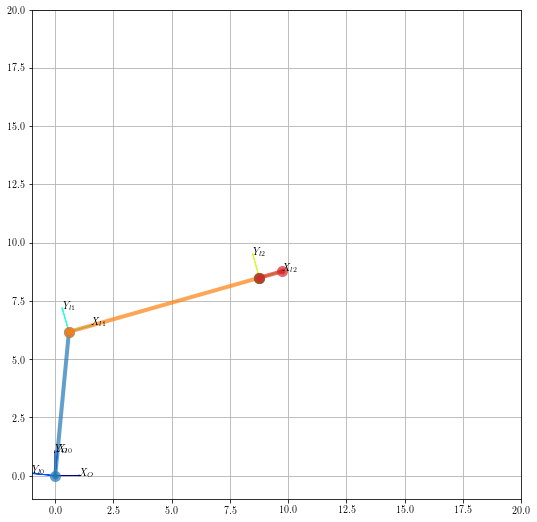

In [63]:
from servos import ServoSB
from links import MultiLink
import numpy as np

class MeArm(object):
    def __init__(self):
        # TODO: complete the DH parameters
        self._L1 = 6.2 # Shoulder to elbow length (cm)
        self._L2 = 8.5 # Elbow to wrist length (cm)
        self._L3 = 8.5 # Wrist to hand length (cm)
        
        self._A1 = 0 # degrees 1st link (90)
        self._A2 = 0 # degrees 2nd link (90)
        self._A3 = 0 # degrees 3rd link (25)
        
        self.D_MAX = self._L1 + self._L2# Max reach in a straight line (cm)
        
        self.ERROR_THRESHOLD = 1 # Play with this to stop the loop
        
        # TODO: connect the servos to their pin and select the range of the angles
        DUMMY_VAL = 1,0,180 # Remove this!
        self.servos = {"base":ServoSB( *DUMMY_VAL ),
                      "shoulder":ServoSB( *DUMMY_VAL ),
                      "elbow":ServoSB( *DUMMY_VAL ),
                      "grip":ServoSB( *DUMMY_VAL )}
    def rad2deg(self, rad):
        return rad/np.pi*180

    def current_body(self):
        # TODO: change Multilink to accept DH specifications
        body = MultiLink()
        #body.addLink(self._L1, self.rad2deg(self._A1))
        body.addLink(self._L1, self.rad2deg(np.pi/2+self._A3))
        body.addLink(self._L2, self.rad2deg(-self._A2))
        body.compose()
        return body

    def base(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving base to:", angle
        
    def shoulder(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving shoulder to:", angle        
    
    def elbow(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving elbow to:", angle
    
    def gripper(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving gripper to:", angle
    
    def openGripper(self):
        #TODO: Move the servo to the angle that opens the gripper
        print "Grip open"
    
    def closeGripper(self):
        #TODO: Move the servo to the angle that closes the gripper
        print "Grip close"
    
    def clap(self):
        self.openGripper(); self.closeGripper()
        self.openGripper(); self.closeGripper()
        self.openGripper()
    
    def plotLinks(self):
        self._body.plotLinks()
    
    def squared_distance(self, p1, p2):
        return np.sum((p1-p2)**2)
    
    def distance(self, p1, p2):
        return np.sqrt(self.squared_distance(p1, p2))    

    def calculate_movement_delta(self, x, y, z):
        # TODO: Do something smart and calculate the angular delta, by using one of the
        # methods from the papers
        delta_A1, delta_A2, delta_A3 = 0, 0, 0
        return (delta_A1, delta_A2, delta_A3)
    
    def alignInXZplane(self, x, z):
        x, z = float(x), float(z)
        A1_delta = np.arctan(z/x) - self._A1
        return self._A1 + A1_delta
    
    def projectionInXYplane(self, d_max, x,y):
        y, x = float(y), float(x)
        p_angle = np.arctan(y/x)
        x_proj_max = d_max * np.cos(p_angle)
        y_proj_max = d_max * np.sin(p_angle)
        
        d_max = self.squared_distance(np.array([0,0]), np.array([x_proj_max, y_proj_max]))
        d_actual = self.squared_distance(np.array([0,0]), np.array([x, y]))
        
        if d_actual < d_max:
            return (x, y)
        else:
            return (x_proj_max, y_proj_max)
    
    def calculate_A2(self, x, y):
        v = (x**2 + y**2 - self._L1**2 - self._L2**2) / (2 * self._L1 * self._L2)
        print("A2 arccos value", v)
        return np.arccos(v)
    
    def calculate_A3(self, A2, x, y):
        num = -(self._L2*np.sin(A2)*x) + (self._L1 + self._L2*np.cos(A2))*y
        den = (self._L2*np.sin(A2)*y) + (self._L1 + self._L2*np.cos(A2))*x
        print("A3 numerator, denominator", num, den)
        return np.arctan(num / den)
    
    def gotoPoint(self, x, y, z):
        #TODO: Implement using one of the methods from the paper
        print "Moving to:",(x,y,z)
        
        # align robot in the plane (Z,X)
        new_A1 = self.alignInXZplane(x,z)
        # Substract claw length from endpoint
        #x -= self._L3
        print "Moving second join to:",(x,y,z)
        # calculate projection of x,y,z in the circles of reach of the 2 links (plane X Y)
        x_proj, y_proj = self.projectionInXYplane(self.D_MAX, x, y)
        # calculate angles A2 and A3
        new_A2 = self.calculate_A2(x_proj, y_proj)
        new_A3 = self.calculate_A3(new_A2, x_proj, y_proj)
        
        # update positions with some angular velocity
        self._A1 = new_A1
        self._A2 = new_A2
        self._A3 = new_A3
        
        print("projections", x_proj,y_proj,z)
        print("angles", self._A1,self._A2,self._A3)
        print("Final position", arm.current_body().jointsToPosition()[:2])
        arm.current_body().plotLinks()
    
arm = MeArm()
arm.clap()
#Go up and left to grab something
arm.gotoPoint(10,7,0); 
#arm.closeGripper();
#Go down, forward and right to drop it
#arm.gotoPoint(70,200,10);
#arm.openGripper();
#Back to start position
#arm.gotoPoint(0,100,50);

Here's a bunch of useful commands you may find useful to debug this:

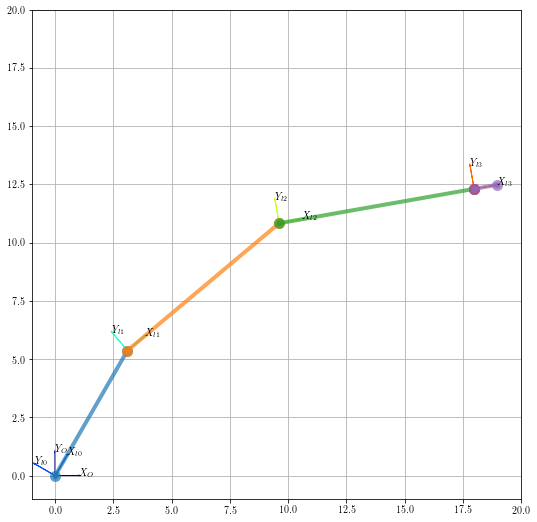

In [27]:
# To see how the MultiLink looks like in 2D
arm.current_body().plotLinks()

In [29]:
# If you want to get the point at the tip of the robot (Direct Kinematic)
arm.current_body().jointsToPosition()[:2]